In [11]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats

def plot_budget(step):
    fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
    data = np.load(fname)
    varnames = ['I','II','III','IV','ddt_ru']
    for name in varnames:
        plt.plot(np.squeeze(data[name]),label=name)
    plt.legend()
    plt.xlim
    plt.show()
    
fs = 12
directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128_no_tkeb/"
filename_prefix = directory+'/shearlayer_'    
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)


Domain size: 150.0 x 299.4140625 x 75.0
Grid size: 256 x 512 x 128
Grid res: 0.5859375 x 0.5859375 x 0.5859375


IOError: [Errno 2] No such file or directory: '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128_no_tkeb//shearlayer_0080_budget_mean_momentum.npz'

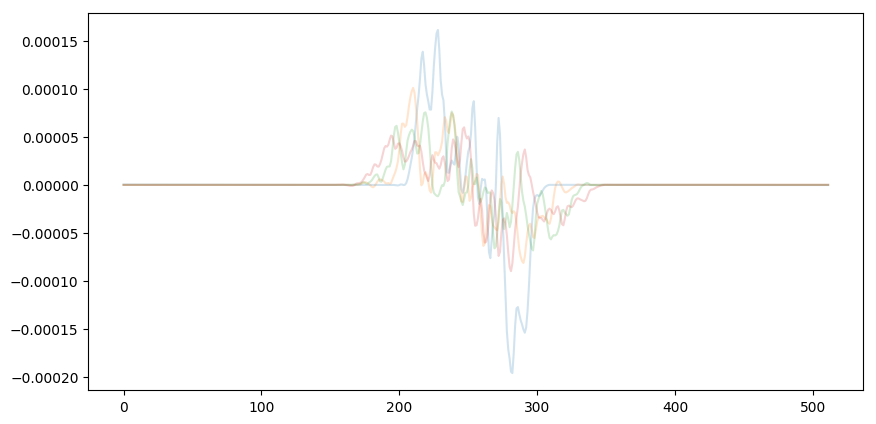

In [36]:
def plot_budget_all(steps):
    
    varnames = ['I','II','III','IV','ddt_ru']
    nvars = np.size(varnames)
    means = np.zeros([nvars,Ny])

    for step in steps:
        fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
        data = np.load(fname)
        for i in range(nvars):
            if varnames[i]=='ddt_ru':
                means[i,:] += np.squeeze(data[varnames[i]])*1e-3
            else:
                means[i,:] += np.squeeze(data[varnames[i]])
    
    # average
    means = means/np.size(steps)
    for i in range(nvars):
        plt.plot(means[i,:],label=varnames[i])
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_budget_one(steps,varname):
    
    means = np.zeros([Ny])
    fig = plt.figure(figsize=(10,5),dpi=100)
    for step in steps:
        fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
        data = np.load(fname)
        plt.plot(np.squeeze(data[varname]),label='t=%i'%data['time'],alpha=0.2)
        means += np.squeeze(data[varname])
    
    # average
    means = means/np.size(steps)
    plt.plot(means,'k-',label='mean')
    plt.title(varname)
    plt.grid(True)
    plt.legend()
    plt.show()

# plot_budget_all(range(40,60,2))
plot_budget_one(range(40,90,10),'ddt_ru')

In [10]:
2.0*np.pi*range(0,1)

TypeError: can't multiply sequence by non-int of type 'float'

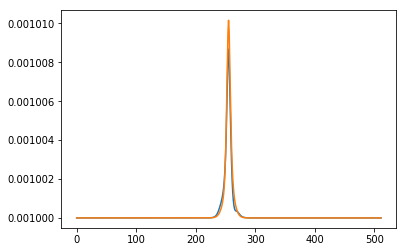

In [14]:
mu = reader.readData('mu')
mu = mu[0]
plt.plot(mu[1,:,1])
mubar = np.mean(np.mean(mu,axis=2),axis=0)
plt.plot(mubar)

(96, 288)

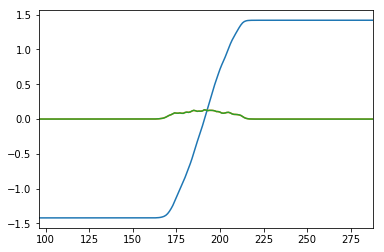

In [104]:
step=7
fname = directory + "/shearlayer_%04d_budget_mean_momentum.npz"%step
data = np.load(fname)
dat = data['ubar3D'][0,:,0]

dudy = np.zeros(Ny)
for i in range(1,Ny-2):
    dudy[i] = (dat[i+1]-dat[i-1])/2./dy

plt.plot(dat)
plt.plot(dudy)
dat = data['uy'][0,:,0]
plt.plot(dat)
plt.xlim([Ny/4,3*Ny/4])